<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Semana 6. Sesión Sincrónica.


El  *cuaderno* tiene dos objetivos:
 1. Introducir a los estudiantes a los contenidos de la semana 6.
 2. Introducir a los estudiantes al análisis de datos espaciales que se estudiarán en la semana 7.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.



## ¿Qué son los sistemas de recomendaciones?


Las preferencias de los individuos suelen seguir patrones que los sistemas de recomendación pueden aprovechar, por ejemplo,

- Si te interesó:  <div style="max-width:200px">
<img src = "figs/iron_man.jpg" />
</div>


- También te puede interesar: <div style="max-width:200px">
<img src = "figs/thor.jpg" />
</div> 




- Los sistemas de recomendación entonces encuentran patrones que son utilizados para predecir qué otros productos podrían gustarnos y generar sugerencias, de forma tal que  los usuarios encuentren contenido atractivo en un gran corpus. 

- Estos sistemas son muy exitosos, por ejemplo según un estudio del 2013 de [McKinsey](https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers), el 35% de los artículos comprados en Amazon surgen de estos sistemas de recomendación, y por lo tanto vale la pena estudiarlos cuidadosamente.

# Filtrado Colaborativo Basado en Usuarios.

El filtrado colaborativo aprovecha el poder de la colaboración para generar recomendaciones. 


Para entender un poco mejor cuál es el problema al que nos enfrentamos, supongamos que tenemos una matriz con 5 usuarios y 5 productos, en este caso restaurantes. 

El valor de la celda denota el rating que le dió cada usuario al ítem. Este valor lo denotamos como $r_{ij}$ que será entonces el rating que le dio el usuario $i$ al restaurante $j$. 
 

##### Ejemplo: Recomendando Restaurantes

In [1]:
#cargamos librerias
import pandas as pd
import numpy as np

In [2]:
# Cargamos y visualizamos  los datos
ratings = pd.read_csv('data/Ratings.csv', encoding='latin-1')
ratings.head()

,restaurant_id,user_id,rating,comentarios
0,1,1,5.0,"Excelente zerbicio, la comida deliziosa."
1,1,2,4.0,NaN
2,1,3,3.0,Comida mala y mal servicio
3,1,4,NaN,NaN
4,1,5,NaN,NaN


In [3]:
r_matrix = ratings.pivot_table(values='rating', index='user_id', columns='restaurant_id')
r_matrix.head()

restaurant_id,1,2,3,4,5
user_id,,,,,
1,5.0,4.0,5.0,NaN,NaN
2,4.0,3.0,4.0,NaN,NaN
3,3.0,2.0,3.0,NaN,NaN
4,NaN,NaN,NaN,4.0,5.0
5,NaN,NaN,NaN,4.0,5.0


## Agregando Información Espacial

##### Usuarios

In [4]:
# Cargamos y visualizamos  los datos
usuarios = pd.read_csv('data/Usuarios.csv')
usuarios.head()

,user_id,nombre,latitud,longitud
0,1,Juan,4.652834,-74.054339
1,2,Maria,4.653065,-74.054058
2,3,Pablo,4.653195,-74.059075
3,4,Joaquin,4.653328,-74.055814
4,5,Martina,4.653515,-74.058822


##### Restaurantes

In [5]:
# Cargamos y visualizamos  los datos
restaurants = pd.read_csv('data/Restaurants.csv')
restaurants.head()

,restaurant_id,latitud,longitud,nombre
0,1,4.651420,-74.054638,Vegan Island
1,2,4.651475,-74.054732,La Verdura Inquieta
2,3,4.651530,-74.054834,El Pirata del sabor vegano
3,4,4.655471,-74.057151,Muuu said the happy cow
4,5,4.655363,-74.057581,Paul's Mcarne Feast Palace


### Transformación a geopandas

In [6]:
#Cargamos geopandas que es la librería a utilizar
import geopandas as gpd

In [7]:
restaurants = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.longitud, restaurants.latitud),crs=4326)
restaurants

,restaurant_id,latitud,longitud,nombre,geometry
0,1,4.651420,-74.054638,Vegan Island,POINT (-74.05464 4.65142)
1,2,4.651475,-74.054732,La Verdura Inquieta,POINT (-74.05473 4.65147)
2,3,4.651530,-74.054834,El Pirata del sabor vegano,POINT (-74.05483 4.65153)
3,4,4.655471,-74.057151,Muuu said the happy cow,POINT (-74.05715 4.65547)
4,5,4.655363,-74.057581,Paul's Mcarne Feast Palace,POINT (-74.05758 4.65536)


In [8]:
usuarios = gpd.GeoDataFrame(usuarios, geometry=gpd.points_from_xy(usuarios.longitud, usuarios.latitud),crs=4326)
usuarios

,user_id,nombre,latitud,longitud,geometry
0,1,Juan,4.652834,-74.054339,POINT (-74.05434 4.65283)
1,2,Maria,4.653065,-74.054058,POINT (-74.05406 4.65306)
2,3,Pablo,4.653195,-74.059075,POINT (-74.05908 4.65320)
3,4,Joaquin,4.653328,-74.055814,POINT (-74.05581 4.65333)
4,5,Martina,4.653515,-74.058822,POINT (-74.05882 4.65351)
5,6,Rosario,4.653647,-74.058792,POINT (-74.05879 4.65365)


### Visualización interactiva

In [9]:
import folium

map = folium.Map(location = [4.65283,-74.054339], tiles = "OpenStreetMap", zoom_start = 16)
# Otras opciones de tiles
#Stamen Terrain, Toner, and Watercolor


for i in range(0,len(restaurants)):
   folium.Marker(
      location=[restaurants.iloc[i]['latitud'], restaurants.iloc[i]['longitud']],
       popup=restaurants.iloc[i]['nombre'],
   ).add_to(map)

for i in range(0,len(usuarios)):
   folium.Marker(
      location=[usuarios.iloc[i]['latitud'], usuarios.iloc[i]['longitud']],
       popup=usuarios.iloc[i]['nombre'], icon=folium.Icon(color='red')
   ).add_to(map)
    

#Display el mapa
map



### Midiendo Distancias

In [10]:
usuarios.geometry.apply(lambda g: restaurants.distance(g))


,0,1,2,3,4
0,0.001445,0.001415,0.001395,0.003855,0.004112
1,0.001744,0.001727,0.001720,0.003919,0.004206
2,0.004779,0.004671,0.004556,0.002980,0.002633
3,0.002241,0.002146,0.002048,0.002526,0.002695
4,0.004679,0.004571,0.004455,0.002573,0.002226
5,0.004713,0.004604,0.004489,0.002454,0.002100


#### Proyecciones: La tierra no es plana!

<div style="max-width:700px">
<img src = "figs/proj.png" />
</div> 

In [12]:
from IPython.display import IFrame
IFrame('https://gifs.com/gif/mercator-projection-y4xP7j', width=700, height=350)

#### Calculamos la distancia

[MAGNA-SIRGAS](https://epsg.io/3116): Marco Geocéntrico Nacional de Referencia,densificación del Sistema de Referencia Geocéntrico para las Américas.

In [ ]:
usuarios= usuarios.to_crs(3116)
restaurants= restaurants.to_crs(3116)
usuarios.geometry.apply(lambda g: restaurants.distance(g))

 <div style="max-width:500px">
<img src = "figs/dist1.png" />
</div> 

# Filtrado Colaborativo Basado en Contenido. Análisis de textos


- Los sistemas basados en contenido, a diferencia de los filtros colaborativos, no requieren datos relacionados a otros individuos u actividades pasadas. 


- Por el contrario, estos brindan recomendaciones basadas en el perfil del usuario y los metadatos que se tiene sobre elementos particulares.


- Parte importante viene de la descripción de los items y esta descripción esta por lo general expresada en texto.


- Visitaremos entonces brevemente como aprovechar esta información para mejorar las recomendaciones.


- Para ello tenemos que encontrar el significado de las expresiones

    - El principio de composicionalidad, que tiene su origen en la filosofía del lenguaje, dice que el significado de una expresión es una función de los significados de sus subexpresiones. 
    - El significado de una oración es una función de los significados de sus frases, el significado de una frase es una función de los significados de sus palabras, y el significado de una palabra es una función de los significados de sus lexemas. 


- Habiendo determinado la estructura de un fragmento de texto, encontrar su significado puede verse como un proceso de abajo hacia arriba, desde los lexemas en la parte inferior pasando por los morfemas, las oraciones, los temas, y más allá.

In [13]:
#cargamos librerias
import pandas as pd
import numpy as np

In [14]:
# Cargamos y visualizamos  los datos
ratings = pd.read_csv('data/Ratings.csv', encoding='latin-1')
ratings

,restaurant_id,user_id,rating,comentarios
0,1,1,5.0,"Excelente zerbicio, la comida deliziosa."
1,1,2,4.0,NaN
2,1,3,3.0,Comida mala y mal servicio
3,1,4,NaN,NaN
4,1,5,NaN,NaN
5,2,1,4.0,NaN
6,2,2,3.0,NaN
7,2,3,2.0,Pésima comida y pésimo servicio
8,2,4,NaN,NaN
9,2,5,NaN,NaN


In [15]:
ratings=ratings.dropna()
ratings

,restaurant_id,user_id,rating,comentarios
0,1,1,5.0,"Excelente zerbicio, la comida deliziosa."
2,1,3,3.0,Comida mala y mal servicio
7,2,3,2.0,Pésima comida y pésimo servicio
10,3,1,5.0,"Comida deliciosa, el servicio excelente!"
11,3,2,4.0,"Excelente servicio, buena comida"
12,3,3,3.0,"La comida llegó fría, el serbizio fue muy malo!"
18,4,4,4.0,"Buena comida, buen servicio"
19,4,5,4.0,"Buen menu, servicio excelente"
23,5,4,5.0,Excelente comida y servicio


- Necesitamos procesar el texto para que sea útil y poder capturar significado de las palabras a través de los morfemas.

- Vamos a realizar unos pasos previos

    - Remover elementos como stopwords, tildes, signos de puntuación, números, y cualquier otro símbolo que pueden llegar a entorpecer el análisis. En este paso las expresiones regulares son especialmente útiles. 
    
  - Separar el texto en palabras o *tokens*
  
  - Encontrar los morfemas o lexemas via *lematización* o *stemming*

##### Comencemos con la limpieza de los comentarios

- Voy a mostrarles como hacerlo con la librería de procesamiento y análisis de texto, ConTexto, desarrollada por el DNP de Colombia.


- Ver https://ucd-dnp.github.io/ConTexto/versiones/master/index.html

In [16]:
print(ratings['comentarios'][12]) 

La comida llegó fría, el serbizio fue muy malo!


In [17]:
# Cargamos las librerías a utilizar ()
from contexto.limpieza import *

from contexto.correccion import Corrector, corregir_texto


texto_corregido = corregir_texto(ratings['comentarios'][12])
print(texto_corregido)

La comida llegó fría, el servicio fue muy malo!


In [18]:
# Para quitar acentos (diéresis, tildes y virgulillas)
texto_corregido=remover_acentos(texto_corregido)
texto_corregido

'La comida llego fria, el servicio fue muy malo!'

In [19]:
import spacy
nlp = spacy.load("es_core_news_sm")

# Cargamos las stopwords extra
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

# Agregamos a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords

#print(nlp.Defaults.stop_words) # Mostrar la nueva lista de stopwords

In [20]:
# corremos limpieza de texto
texto_corregido=limpieza_texto(texto_corregido,lista_palabras=extra_stopwords)
texto_corregido

'comida llego fria servicio malo'

##### Lematización
 
- Operación que consiste en transformar las palabras de su forma flexionada (plural, femenino, conjugaciones, etc.) a su lema correspondiente, el cual es el representante de todas las formas flexionadas de una misma palabra. 
 
 
 - Por ejemplo, las palabras niños, niña y niñito tienen todas el mismo lema: niño. 
 
 
 - Realizar lematización sobre textos puede simplificarlos, al unificar palabras que comparten el mismo lema, y evitando así tener un vocabulario más grande de lo necesario.

In [21]:
#La primera vez que se utilice una combinación particular de lenguaje + tamaño, la librería descargará el modelo correspondiente en el computador del usuario. 
#Para usarlo, se debe reiniciar la sesión y correr la función de nuevo.
from contexto.lematizacion import LematizadorSpacy
from contexto.lematizacion import lematizar_texto


texto_corregido = lematizar_texto(texto_corregido)

texto_corregido

[INFO] Descargando modelo. Este proceso puede tardar varios minutos.


[INFO] El modelo ha sido descargado.
[INFO] Por favor correr de nuevo el script, o iniciar una nueva sesión de Python para cargarlo.
[INFO] Hasta entonces, se utilizará un modelo en blanco.



'    '

In [22]:
# Agregar lemas desde un diccionario

segundo_dict = {
    "llego" : "llegar",
    "deliciós": "delicioso",
    "comido": "comida",
    "malo":"mal"
    
}
texto_lematizado = lematizar_texto(texto_corregido, dict_lemmas=segundo_dict)
print(texto_lematizado)


##### Stemming 

- El stemming es un método para reducir todas las formas flexionadas de palabras a su «raíz» o «tallo» (stem, en inglés), cuando estas comparten una misma raíz.


- Por ejemplo, las palabras niños, niña y niñez tienen todas la misma raíz: «niñ». A diferencia de la lematización, en donde cada lema es una palabra que existe en el vocabulario del lenguaje correspondiente, las palabras raíz que se obtienen al aplicar stemming no necesariamente existen por sí solas como palabra.


- Aplicar stemming a textos puede simplificarlos, al unificar palabras que comparten la misma raíz, y evitando así tener un vocabulario más grande de lo necesario.

In [23]:
from contexto.stemming import Stemmer, stem_texto

# Determinar automáticamente el lenguaje del texto
texto_stem = stem_texto(texto_lematizado, 'auto')
print(texto_stem)

- Podemos definir todas juntas

In [24]:
ratings['comentarios']

0           Excelente zerbicio, la comida deliziosa. 
2                          Comida mala y mal servicio
7                     Pésima comida y pésimo servicio
10           Comida deliciosa, el servicio excelente!
11                   Excelente servicio, buena comida
12    La comida llegó fría, el serbizio fue muy malo!
18                       Buena comida, buen servicio 
19                      Buen menu, servicio excelente
23                        Excelente comida y servicio
Name: comentarios, dtype: object

In [25]:
# Funcion que limpia el texto y separa en tokens
def text_cleaning(txt):

    out = corregir_texto(txt)
    out= remover_acentos(out)
    out= limpieza_texto(out,lista_palabras=extra_stopwords)
    out=lematizar_texto(out)
    out=lematizar_texto(out, dict_lemmas=segundo_dict)
#    out=stem_texto(out, 'auto')
    return out


clean = ratings['comentarios'].apply(text_cleaning)
clean

0     excelente servicio comida delicioso
2                 comida mal mal servicio
7           pesimo comida pesimo servicio
10    comida delicioso servicio excelente
11         excelente servicio buen comida
12        comida llegar frio servicio mal
18              buen comida buen servicio
19           buen menu servicio excelente
23              excelente comida servicio
Name: comentarios, dtype: object

### Similaridad entre las comentarios

In [26]:
from contexto.comparacion import Similitud, Distancia, DiferenciaStrings
from contexto.vectorizacion import *

# Bolsa de palabras
v_bow = VectorizadorFrecuencias()
v_bow.ajustar(clean)


In [27]:
from IPython.display import display

display(v_bow.vocabulario().head(10))

,posición,palabra
0,0,buen
1,1,comida
2,2,delicioso
3,3,excelente
4,4,frio
5,5,llegar
6,6,mal
7,7,menu
8,8,pesimo
9,9,servicio


In [28]:
# Similitud de coseno
s_bow = Similitud(v_bow)
coseno_bow = s_bow.coseno(clean)
coseno_bow

array([[1.        , 0.40824829, 0.40824829, 1.        , 0.75      ,
        0.4472136 , 0.40824829, 0.5       , 0.8660254 ],
       [0.40824829, 1.        , 0.33333333, 0.40824829, 0.40824829,
        0.73029674, 0.33333333, 0.20412415, 0.47140452],
       [0.40824829, 0.33333333, 1.        , 0.40824829, 0.40824829,
        0.36514837, 0.33333333, 0.20412415, 0.47140452],
       [1.        , 0.40824829, 0.40824829, 1.        , 0.75      ,
        0.4472136 , 0.40824829, 0.5       , 0.8660254 ],
       [0.75      , 0.40824829, 0.40824829, 0.75      , 1.        ,
        0.4472136 , 0.81649658, 0.75      , 0.8660254 ],
       [0.4472136 , 0.73029674, 0.36514837, 0.4472136 , 0.4472136 ,
        1.        , 0.36514837, 0.2236068 , 0.51639778],
       [0.40824829, 0.33333333, 0.33333333, 0.40824829, 0.81649658,
        0.36514837, 1.        , 0.61237244, 0.47140452],
       [0.5       , 0.20412415, 0.20412415, 0.5       , 0.75      ,
        0.2236068 , 0.61237244, 1.        , 0.57735027],


### Modelado de tópicos

- Contar palabras puede ser una forma bastante buena de cuantificar de qué se trata un documento, pero no es perfecta.


- Supongamos que estamos tratando de categorizar documentos en diferentes géneros. 


- Si un documento contiene la palabra "láser" o "robot" u otras palabras similares, esa es una buena señal de que es una palabra de ingeniería  o una historia de ciencia ficción. 


- Supongamos además que muchas de estas palabras relacionadas con la tecnología simplemente ocurren una vez, digamos, "fotón" aparece solo en un artículo de ingeniería y "Warp" aparece solo en un historia de ciencia ficción. 


- Esa no sería una muy buena evidencia de que los documentos que mencionan "fotón" son ingeniería y los documentos que mencionan "Warp" son ciencia ficción. 


- Sería más razónable que un modelo aprenda que todas estas son palabras relacionadas con la tecnología, y que las palabras relacionadas con la tecnología  son indicativas tanto de ingeniería como de ciencia ficción.


- Es decir, estas palabras pertenecen al tema de la tecnología, y tanto la ingeniería como la ciencia ficción usan estas palabras.


- ¿Cómo podríamos aprender esos temas automáticamente? La respuesta más utilizada es LDA


- La idea detrás LDA, es responder ¿qué pasa si usamos vectores donde cada componente del vector es un tema diferente? 



- En estos casos estamos buscando encontrar de forma no supervizada cual es el factor (tópico o tema) subyacente del texto.

#### Aside: Ejemplo paso a paso

En este ejemplo vamos a asumir que hay 3 documentos (D), que contienen 3 temas (K) y 7 (V) palabras

- Paso 1: Definir el vocabulario

In [29]:
vocabulario = ["gato", "perro", "vacuna", "hospital", "dinero", "banco", "impuestos"]
V = len(vocabulario)
print(V)

7


* ¿Por qué definir el vocabulario?*
El vocabulario es el conjunto de palabras que pueden aparecer en nuestros documentos. Definirlo es fundamental porque todas las distribuciones de tópicos y palabras se basan en este conjunto. En LDA, cada palabra generada pertenece al vocabulario, y las probabilidades de cada tópico se asignan sobre estas palabras.

- Paso 2: Definir las distribuciones de palabras por tópico (φ)

Estas salen de una Dirichlet, mas sobre esto abajo

In [30]:
phi_1 = [0.4, 0.4, 0.05, 0.05, 0.03, 0.03, 0.04]  # Animales
phi_2 = [0.05, 0.05, 0.4, 0.4, 0.03, 0.03, 0.04]  # Salud
phi_3 = [0.05, 0.05, 0.05, 0.05, 0.35, 0.35, 0.10]  # Economía
phi = [phi_1, phi_2, phi_3]
print(phi)

[[0.4, 0.4, 0.05, 0.05, 0.03, 0.03, 0.04], [0.05, 0.05, 0.4, 0.4, 0.03, 0.03, 0.04], [0.05, 0.05, 0.05, 0.05, 0.35, 0.35, 0.1]]


- Paso 3: Definir mezcla de tópicos del documento (θ)

Ahora si veamos como funciona la Dirichlet. Esta distribución es una de las pocas distribuciones que modela directamente vectores de probabilidades. Es decir, vectores cuyas componentes:

- son no negativas,

- y suman exactamente 1.

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Paso 3: Definir mezcla de tópicos del documento (θ)
np.random.seed(123)
D = 3  # número de documentos
alpha = [1, 1, 20]  # K=3

# Generar muestras de la Dirichlet
samples = dirichlet.rvs(alpha, size=D)
df = pd.DataFrame(samples, columns=["Topico1", "Topico2", "Topico3"])
print(df)


    Topico1   Topico2   Topico3
0  0.053042  0.014996  0.931962
1  0.030199  0.216902  0.752899
2  0.024299  0.018446  0.957255


In [32]:
theta_d = df.iloc[0].values  # de arriba
print(theta_d)

[0.05304217 0.01499556 0.93196227]


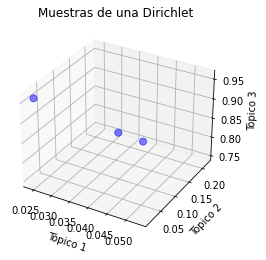

In [33]:

# Graficar puntos de masa 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Topico1"], df["Topico2"], df["Topico3"], color="blue", alpha=0.5, s=50)
ax.set_xlabel("Tópico 1")
ax.set_ylabel("Tópico 2")
ax.set_zlabel("Tópico 3")
plt.title("Muestras de una Dirichlet")
plt.show()

- Paso 4: Número de palabras en el documento

In [34]:
N = 10


- Paso 5: Generar los tópicos z_1, ..., z_N

In [35]:
z = np.random.choice([1, 2, 3], size=N, replace=True, p=theta_d)
print(z)

[2 3 3 3 3 3 3 3 3 3]


- Paso 6: Generar palabras según los tópicos

In [36]:
w = []
for n in range(N):
  topic_idx = z[n] - 1  # z es 1-indexado, Python usa 0-indexado
  word = np.random.choice(vocabulario, size=1, p=phi[topic_idx])[0]
  w.append(word)

# Resultado: palabras generadas
pd.DataFrame({"Posición": range(1, N+1), "Palabra": w, "Tópico": z})

,Posición,Palabra,Tópico
0,1,hospital,2
1,2,banco,3
2,3,dinero,3
3,4,dinero,3
4,5,dinero,3
5,6,dinero,3
6,7,banco,3
7,8,perro,3
8,9,dinero,3
9,10,dinero,3


- Paso 7: Bag of Words (conteo por palabra)

In [37]:
from collections import Counter

bow = Counter(w)
bow_ordered = {word: bow.get(word, 0) for word in vocabulario}
print(bow_ordered)


{'gato': 0, 'perro': 1, 'vacuna': 0, 'hospital': 1, 'dinero': 6, 'banco': 2, 'impuestos': 0}


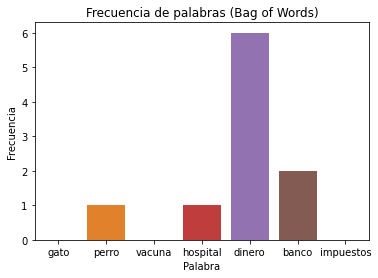

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=list(bow_ordered.keys()), y=list(bow_ordered.values()))
plt.title("Frecuencia de palabras (Bag of Words)")
plt.ylabel("Frecuencia")
plt.xlabel("Palabra")
plt.show()

#### Ingenieria reversa

Hasta ahora, simulamos documentos **generando** palabras. Pero en la realidad en la pratica

* Un corpus de documentos reales → textos observados.
* Una representación en BoW o DTM.


Lo que buscamos es inferir los **parámetros** del modelo:

  * Las mezclas de tópicos por documento $\theta_d$,
  * Las distribuciones de palabras por tópico $\phi_k$,
  * Las asignaciones de tópicos $z_{d,n}$ para cada palabra.

Es la ingenieria reversa de MLE: queremos encontrar los parámetros que hacen más **verosímil** (más probable) haber observado nuestros documentos.


$$
\max_{\theta, \phi} \ p(\text{documentos} \mid \theta, \phi)
$$

Pero en LDA no observamos los $z_{d,n}$, ni $\theta$, ni $\phi$. 

**Solo observamos las palabras.**

El problema a resolver es la siguiente verosimilitud:

$$
p(\mathbf{w} \mid \alpha, \beta) = \int \sum_{\mathbf{z}} p(\mathbf{w}, \mathbf{z}, \theta, \phi \mid \alpha, \beta) \ d\theta \ d\phi
$$

Este término **no se puede calcular exactamente**: la suma sobre todas las posibles asignaciones de tópicos $\mathbf{z}$ es **exponencial**.

¿Por qué es "exponencial"?

Porque si: hay $N$ palabras en total en el corpus,  y cada palabra puede tener **uno de $K$ tópicos**, entonces hay: $K^N$ posibles combinaciones de asignaciones de tópicos. Ejemplo: supongamos

* 2 documentos, cada uno con 10 palabras → $N = 20$,
* 3 posibles tópicos → $K = 3$

Entonces hay:

$$
3^{20} = 3,486,784,401
$$

combinaciones posibles de $\mathbf{z}$. 

Entonces

* No podemos **sumar sobre todas** esas posibilidades explícitamente.
* Por eso necesitamos métodos que **aproximen esa suma**:


En la practica hay varios métodos de **inferencia aproximada**, que estiman los parámetros.

Los dos más comunes:

1. **Gibbs Sampling** (una forma de MCMC)
2. **Variational Inference** (una versión determinista, más rápida)


#### Regresamos a nuestro ejemplo de los comentarios

In [39]:
# Cargamos la función 
from gensim.corpora import Dictionary

#helper function
def splitter(txt):
    out = txt.split(" ")
    return out

clean = clean.apply(splitter)
clean

0     [excelente, servicio, comida, delicioso]
2                 [comida, mal, mal, servicio]
7           [pesimo, comida, pesimo, servicio]
10    [comida, delicioso, servicio, excelente]
11         [excelente, servicio, buen, comida]
12       [comida, llegar, frio, servicio, mal]
18              [buen, comida, buen, servicio]
19           [buen, menu, servicio, excelente]
23               [excelente, comida, servicio]
Name: comentarios, dtype: object

In [40]:
# Creamos la representación de diccionario del documento
dictionary = Dictionary(clean)
dictionary


In [41]:
corpus = [dictionary.doc2bow(doc) for doc in clean]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 1), (3, 1), (4, 2)],
 [(0, 1), (3, 1), (5, 2)],
 [(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 1), (2, 1), (3, 1), (6, 1)],
 [(0, 1), (3, 1), (4, 1), (7, 1), (8, 1)],
 [(0, 1), (3, 1), (6, 2)],
 [(2, 1), (3, 1), (6, 1), (9, 1)],
 [(0, 1), (2, 1), (3, 1)]]

In [42]:
from gensim.models import LdaModel

Estimacion = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    chunksize=1000,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=123,
    eval_every=None
)

In [43]:
from pprint import pprint

pprint(Estimacion.print_topics())

[(0,
  '0.193*"menu" + 0.192*"buen" + 0.192*"excelente" + 0.192*"servicio" + '
  '0.039*"comida" + 0.039*"delicioso" + 0.039*"pesimo" + 0.039*"mal" + '
  '0.039*"frio" + 0.039*"llegar"'),
 (1,
  '0.245*"servicio" + 0.244*"comida" + 0.198*"excelente" + 0.151*"buen" + '
  '0.104*"delicioso" + 0.012*"mal" + 0.012*"llegar" + 0.012*"frio" + '
  '0.012*"menu" + 0.012*"pesimo"'),
 (2,
  '0.283*"mal" + 0.195*"servicio" + 0.195*"comida" + 0.109*"frio" + '
  '0.109*"llegar" + 0.022*"excelente" + 0.022*"buen" + 0.022*"pesimo" + '
  '0.022*"delicioso" + 0.022*"menu"'),
 (3,
  '0.347*"pesimo" + 0.192*"comida" + 0.192*"servicio" + 0.039*"excelente" + '
  '0.039*"delicioso" + 0.039*"buen" + 0.039*"mal" + 0.039*"menu" + '
  '0.039*"llegar" + 0.039*"frio"')]


In [45]:
?LdaModel.get_document_topics


In [46]:
l=[Estimacion.get_document_topics(item) for item in corpus]
l

[[(0, 0.012655084), (1, 0.95526034), (2, 0.019107873), (3, 0.012976743)],
 [(0, 0.012655079), (1, 0.046342954), (2, 0.9280252), (3, 0.0129767405)],
 [(0, 0.012655081), (1, 0.04660532), (2, 0.01910816), (3, 0.92163146)],
 [(0, 0.012655084), (1, 0.95526034), (2, 0.019107873), (3, 0.012976743)],
 [(0, 0.012655082), (1, 0.95526034), (2, 0.019107867), (3, 0.0129767405)],
 [(0, 0.010309739), (1, 0.037556592), (2, 0.94156194), (3, 0.010571787)],
 [(0, 0.012655083), (1, 0.95526034), (2, 0.019107869), (3, 0.012976742)],
 [(0, 0.92106533), (1, 0.046850067), (2, 0.019107834), (3, 0.012976742)],
 [(0, 0.016381735), (1, 0.94208527), (2, 0.024734909), (3, 0.016798118)]]

## Consideraciones sobre LDA


- Cuando se analiza el modelado de tópicos, es importante reforzar continuamente el hecho de que los grupos de palabras que representan los tópicos no están relacionados conceptualmente; están relacionados solo por proximidad. 


- La proximidad frecuente de ciertas palabras en los documentos es suficiente para definir tópicos debido a que estamos asumiendo que todas las palabras en el mismo documento están relacionadas.


- Sin embargo, esta suposición puede no ser cierta o las palabras pueden ser demasiado genéricas para formar tópicos coherentes. 


- La interpretación de tópicos abstractos implica equilibrar las características innatas de los datos de texto con las agrupaciones de palabras generadas. 


- Es importante tener en cuenta también que la naturaleza ruidosa de los datos de texto puede hacer que los modelos de temas asignen palabras no relacionadas con uno de los tópicos a ese tema en particular. 


- Recuerden "GIGO" (garbage in, garbage out) si entra basura, sale basura. 

# Información de Sesión

In [ ]:
import session_info

session_info.show(html=False)